# Rubik's cube simulation in 15 lines of numpy

The goal of this project was to implement the entire logic of a rubik's cube using the base funcitonnality of numpy:
- reshaping
- multi-indexing
- indices

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

## The core logic

This create a permutation inside a tensor of shape $5 \ times N \times N \times N \ times 3 \times 2$

The idea is that the five parameters `(ix, iy, iz, d, a)` contains exactly the information about the location of a tiny cube:  at cell `(ix, iy, iz)`, oriented in direction `d`, and `a` indicates the way it points (up or down, right or left ...).

Then, we can define a huge array, with one element for each position.
Here comes the magic sauce: A configuration of the rubik's cube is just a particular permutation of this huge array !

In [54]:
arr = lambda shape, *x: np.array(x,dtype=int).reshape(shape)
cho = lambda *s: np.random.choice(*s,replace=False)
i3  = arr((3,),0,1,2)

solved = lambda n: np.indices((n,n,n,3,2))

def move(n, i, d, d1, d2):
    # create the random permutation
    s = solved(n)
    result = s
    idx = [slice(n)]*3
    idx[d] = i
    result[d1, *idx] =           s[d2, *idx]
    result[d2, *idx] =       n-1-s[d1, *idx]
    result[-2, *idx, [d1, d2]] = s[-2,  *idx, [d2, d1]]
    result[-1, *idx, d1] =     1-s[-1, *idx, d2]
    return result

## Display

Then, we need a code to display our cube.

In [55]:
COLORS = arr((3,2,3),*"002010220222200210")/2
SQUARE = arr((4, 3), *"000010110100")

def display(ax, cube):
    N = cube.shape[1]
    patches = []
    ax.clear()
    ax.set_axis_off()
    ax.set_xlim(-N*2, N*2)
    ax.set_ylim(-N*3, N*3)
    for d in i3:
        for p in np.ndindex(N,N,N):
            if p[d]==0:
                s=SQUARE.copy()
                s[:, [2,d]]=s[:, [d,2]]
                x,y,z = (s+p).T
                losange=arr((2, 4), x-z,x-2*y+z)
                c=COLORS[*cube[-2:, *p, d, 0]]
                polygon = Polygon(losange.T, edgecolor="0", facecolor=c)
                patches.append(ax.add_patch(polygon))
    return patches

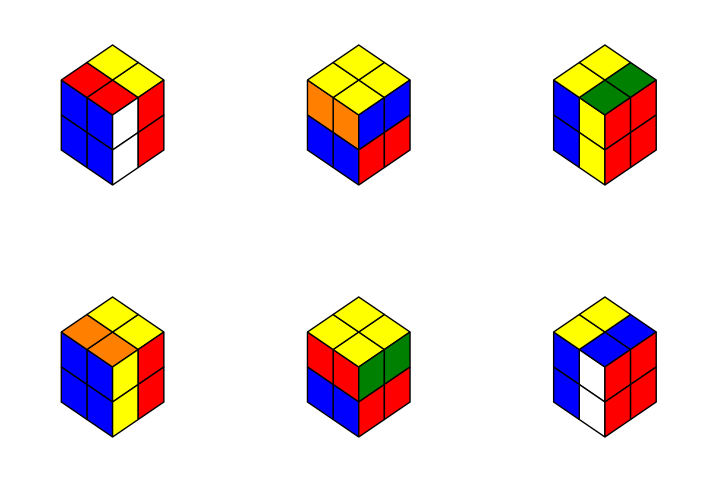

In [58]:
r0 = solved(2)

fig, axes = plt.subplots(2, 3, figsize=(9,6))

for k, row in zip([-1, 1], axes):
    for i, ax in enumerate(row):
        m = move(2, 0, i, (i+k+3)%3, (i-k+3)%3)
        r = r0[:, *m]
    
        display(ax, r)
plt.show()

In [62]:
import matplotlib.animation
plt.rcParams["animation.html"] = "jshtml"
plt.ioff()
r = solved(4)
fig, ax = plt.subplots()
display(ax, r)

def update(t):
    global r
    m = move(4, cho(i3), *cho(i3, 3))
    r = r[:, *m]
    return display(ax, r)

matplotlib.animation.FuncAnimation(fig, update, frames=20, interval=500)